# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
### **Árboles de decisión y bosque aleatorio.**

### Equipo 48


**Nombres y matrículas de los integrantes del equipo:**

* Axel Alejandro Tlatoa Villavicencio - A01363351
* Christopher Valdéz Cantú - A01793549
* Ernesto Nicanor Santillán Guerrero - A01793675
* Alejandro Jesús Vázquez Navarro - A01793146  


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [109]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 

# Toda la navaja suiza para machine learning
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Para los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Para la validación cruzada
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

import seaborn as sns  

#Para probar las métricas
from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score

# Para tabulación
from tabulate import tabulate

# Para las curvas de aprendizaje
from sklearn.model_selection import learning_curve, validation_curve

# Para el Scaling
from sklearn.preprocessing import StandardScaler   

# Para el fine tuning
from sklearn.model_selection import GridSearchCV

# para mostrar los arboles
from sklearn import tree
import pydotplus 
from IPython.display import Image

# Para eliminar warnings:
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

# mostrar hasta 40 columnas
pd.options.display.max_columns=40


# **Ejercicio-1.** 
**-Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como 
se indica en la página de la UCI.**

**NOTA: Si lo deseas, puedes traducirlos y ponerlas en español**

# Extraer tabla de codigos

In [36]:
code_t=pd.read_csv("codetable.txt",skip_blank_lines=True,header=None)


In [37]:
code_t = code_t[code_t[0].str.startswith('$')]

In [38]:
codes=list(code_t[0].values)

In [39]:
codes

['$`laufkont = status`',
 '$`laufzeit = duration`',
 '$`moral = credit_history`',
 '$`verw = purpose`',
 '$`hoehe = amount`',
 '$`sparkont = savings`',
 '$`beszeit = employment_duration`',
 '$`rate = installment_rate`',
 '$`famges = personal_status_sex`',
 '$`buerge = other_debtors`',
 '$`wohnzeit = present_residence`',
 '$`verm = property`',
 '$`alter = age`',
 '$`weitkred = other_installment_plans`',
 '$`wohn = housing`',
 '$`bishkred = number_credits`',
 '$`beruf = job`',
 '$`pers = people_liable`',
 '$`telef = telephone`',
 '$`gastarb = foreign_worker`',
 '$`kredit = credit_risk`']

In [40]:
codes=[item.replace("$","").replace("`","").replace(" ","").split(sep="=") for item in codes]

In [41]:
codes

[['laufkont', 'status'],
 ['laufzeit', 'duration'],
 ['moral', 'credit_history'],
 ['verw', 'purpose'],
 ['hoehe', 'amount'],
 ['sparkont', 'savings'],
 ['beszeit', 'employment_duration'],
 ['rate', 'installment_rate'],
 ['famges', 'personal_status_sex'],
 ['buerge', 'other_debtors'],
 ['wohnzeit', 'present_residence'],
 ['verm', 'property'],
 ['alter', 'age'],
 ['weitkred', 'other_installment_plans'],
 ['wohn', 'housing'],
 ['bishkred', 'number_credits'],
 ['beruf', 'job'],
 ['pers', 'people_liable'],
 ['telef', 'telephone'],
 ['gastarb', 'foreign_worker'],
 ['kredit', 'credit_risk']]

In [42]:
german_codes = [i[0] for i in codes]
english_codes = [i[1] for i in codes]

In [43]:
german_codes

['laufkont',
 'laufzeit',
 'moral',
 'verw',
 'hoehe',
 'sparkont',
 'beszeit',
 'rate',
 'famges',
 'buerge',
 'wohnzeit',
 'verm',
 'alter',
 'weitkred',
 'wohn',
 'bishkred',
 'beruf',
 'pers',
 'telef',
 'gastarb',
 'kredit']

In [44]:
english_codes

['status',
 'duration',
 'credit_history',
 'purpose',
 'amount',
 'savings',
 'employment_duration',
 'installment_rate',
 'personal_status_sex',
 'other_debtors',
 'present_residence',
 'property',
 'age',
 'other_installment_plans',
 'housing',
 'number_credits',
 'job',
 'people_liable',
 'telephone',
 'foreign_worker',
 'credit_risk']

In [110]:
dfMain = pd.read_csv("SouthGermanCredit.asc", sep=" ")
dfMain.columns=english_codes

# # Traducción al inglés para manejarlo más fácilmente.

# nuevasColumnas = {'laufkont':'status', 'laufzeit': 'duration', 'moral':'credit_history', 'verw':'purpose', 
#                   'hoehe':'amount', 'sparkont':'savings', 'beszeit': 'employment_duration', 'rate': 'installment_rate',
#                   'famges': 'personal_status_sex', 'buerge':'other_debtors', 'wohnzeit':'present_residence', 
#                  'verm':'property', 'alter': 'age', 'weitkred':'other_installment_plans', 'wohn': 'housing',
#                  'bishkred':'number_credits', 'beruf':'job', 'pers': 'people_liable', 'telef': 'telephone',
#                  'gastarb': 'foreign_worker', 'kredit': 'credit_risk'}

# # Recordar que la variable credit_risk es la dependiente
# dfMain.rename(columns = nuevasColumnas, inplace=True)


# Revisar si estamos leyendo los mil registros con 21 columnas
dfMain.shape

dfMain.head(5)



,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


# **Ejercicio-2.**
**-Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 
15%.**

**-Los modelos se estarán entrenando con el método de validación cruzada, así que no es 
necesario en este paso generar el conjunto de validación.**

**-Define como la variable X a todas las variables de entrada y a la variable Y como la variable de salida**

In [46]:
X = dfMain.loc[:, dfMain.columns != "credit_risk"]
Y = dfMain["credit_risk"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.85, random_state=10,stratify=Y)

print(X.shape)
print(Y.shape)

(1000, 20)
(1000,)


# **Ejercicio-3.**

**Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas 
para generar los primeros modelos.**

**En la misma página de la UCI se indica el tipo de variable de cada uno de los factores.**

**-Definen cuatro tipo de variables: categórica (categorical), ordinal (discretized quantitative), numérica (quantitative) y binaria (binary).** 

**-Con base a dicha información realiza un Pipeline que incluya al menos las siguientes transformaciones:** 



a. Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable 
(decide y justifica que tipo de imputación realizas en cada caso). 

b. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una 
transformación que escale a todas ellas en un rango equiparable. 

c. Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y 
binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la 
transformación one-hot encoding. Por el momento dejar las variables ordinales sin 
transformar. 

In [47]:
# Lo primero que debemos hacer es identificar los tipos de variable, posteriormente identificar dónde hay valors NaN, 
# calcular distribuciones y posteriormente determinar el mejor criterio para imputar datos faltantes
# Identificación de tipo de variables

print(f'Todas mis columnas: {dfMain.columns}')

#Variables categóricas
colsCategoricas = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans',
                   'housing', 'job']

dfCategoricas = dfMain[colsCategoricas]
# Valores Nan. ¿Cuántos hay?
print(f'Para el conjunto de variables categóricas hay: \n{ dfCategoricas.isnull().sum() } valores nulos')
print("---" * 20)


#-----------------------------------------------------------------------

#Variables ordinales
dfOrdinales = dfMain[['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits',
                     'people_liable']]

# Valores Nan. ¿Cuántos hay?
print(f'Para el conjunto de variables ordinales hay: \n{dfOrdinales.isna().sum()} valores nulos')
print("---" * 20)

#------------------------------------------------------------------------
# Hasta este momento, no se detectan valores perdidos en las variables categóricas y ordinales.
# Por lo tanto no necesitamos realizar ningún tipo de imputación de datos.
# Analicemos las variables numéricas y su distribución

#Variables numéricas
colNumericas = ['duration', 'amount', 'age']
dfNumericas = dfMain[colNumericas]


# Valores Nan. ¿Cuántos hay?
print(f'Para el conjunto de numéricas categóricas hay: \n{dfNumericas.isna().sum()} valores nulos')
print("---" * 20)

sns.set(rc={'figure.figsize':(15,6)})
fig, axes = plt.subplots(1, 3)   

for k in range(0,3):       
    plt.subplot(1,3,k+1) 
    Transf0 = dfNumericas[colNumericas[k]]          
    sns.histplot(data=Transf0, bins=10)                    
    
    if k==0:
          plt.ylabel('Originales')

# Derivado de este análisis podemos aplicar transformaciones a las variables numéricas para que estén en un rango equiparable
#-------------------------------------------------------------------------

#Variables binarias
dfBinarias = dfMain[['telephone', 'foreign_worker', 'credit_risk']]


# Valores Nan. ¿Cuántos hay?
print(f'Para el conjunto de variables Binarias hay:  \n{dfBinarias.isna().sum()} valores nulos')
print("---" * 20)



Todas mis columnas: Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')
Para el conjunto de variables categóricas hay: 
credit_history             0
purpose                    0
personal_status_sex        0
other_debtors              0
property                   0
other_installment_plans    0
housing                    0
job                        0
dtype: int64 valores nulos
------------------------------------------------------------
Para el conjunto de variables ordinales hay: 
status                 0
savings                0
employment_duration    0
installment_rate       0
present_residence      0
number_credits         0
people_liable          0
dtype: int64

In [48]:
# Transformación de las variables numéricas

num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   

num_pipeline_nombres = colNumericas

# Transformación One-Hot encoding a variables de entrada de tipo categórico:

catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])

catOHE_pipeline_nombres = colsCategoricas


# Creación de Pipeline:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

# **Ejercicio-4.**
Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de 
aprendizaje automático: **Regresión Logística, Árbol de Decisión y Bosque Aleatorio**. 

Deberás llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda 
aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las 
siguientes características:

- a. Usa los parámetros predeterminados de cada modelo. 


- b. En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, 
recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes 
definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn. 
Sin embargo, sí puedes usar la información regresada por el método confusion_matrix() 
de scikit-learn para definir las métricas). 


- c. Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones. 


- d. Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como 
para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la 
métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu 
respuesta. 


- e. En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de 
estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado: 
    - i. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando 
    el tamaño de la muestra para el modelo de regresión Logística con su 
    hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de 
    los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del 
    desempeño de dicha función “learning_curve()”. 
    - ii. Obtener las curvas de validación (validation_curve) en la cual se va incrementando 
    la complejidad del hiperparámetro “max_depth” para el modelo de árbol de 
    decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima 
    profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del 
    desempeño del modelo. 
    - iii. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando 
    el tamaño de la muestra para el modelo de regresión bosque aleatorio (random 
    forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en 
    la partición de los conjuntos de entrenamiento y la métrica “recall”, como 
    evaluación del desempeño del modelo. 

In [49]:
# Celda de métricas

def mi_accuracy(yreal, ypred):


    tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
    tot = tn + fp + fn + tp

    accuracy = (tp + tn) / tot 
   
    return accuracy

def mi_precision(yreal, ypred):


    tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
    tot = tn + fp + fn + tp

    precision = tp / (tp + fp) 
   
    return precision

def mi_recall(yreal, ypred):


    tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
    tot = tn + fp + fn + tp

    recall = tp / (tp + fn) 
   
    return recall


def mi_f1score(yreal, ypred):

    precision = mi_precision(yreal, ypred)
    recall = mi_recall(yreal, ypred)
    
    f1score = 2 * (precision * recall) / (precision + precision)
   
    return recall

def mi_gmean(yreal, ypred):


    tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
    tot = tn + fp + fn + tp


    recall = tp / (tp+fn)
    especificidad = tn / (tn+fp)
   
    gmean = np.sqrt(recall * especificidad)

    return gmean




In [50]:
def get_models():
    modelos = list()
    nombres = list()

  # LR - Regresión Logística:
    modelos.append(LogisticRegression(solver='liblinear'))
    nombres.append('LR')

  # DT - Árbol de Decisión:
    modelos.append(DecisionTreeClassifier())
    nombres.append('DT')
  
  # RF - Random Forest:
    modelos.append(RandomForestClassifier())
    nombres.append('RF')

  
    return modelos, nombres

In [51]:
modelos, nombres = get_models()  
resultados = list()   
tabla = list()

for i in range(len(modelos)):

    kfold  = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    pipe  = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

    mismetricas = {'accuracy':make_scorer(mi_accuracy), 'precision': make_scorer(mi_precision), 
                   'recall':make_scorer(mi_recall), 'f1': make_scorer(mi_f1score), 'gmean':make_scorer(mi_gmean) }

    resultadosOU = cross_validate(pipe, 
                                      X, Y,
                                      scoring=mismetricas,
                                      cv=kfold,
                                      return_train_score=True)
    resultados.append(resultadosOU)
    
    train_accuracy = np.mean(resultadosOU["train_accuracy"])
    test_accuracy  = np.mean(resultadosOU["test_accuracy"])
    
    train_precision = np.mean(resultadosOU["train_precision"])
    test_precision  = np.mean(resultadosOU["test_precision"])
    
    train_recall = np.mean(resultadosOU["train_recall"])
    test_recall  = np.mean(resultadosOU["test_recall"])
    
    train_f1 = np.mean(resultadosOU["train_f1"])
    test_f1  = np.mean(resultadosOU["test_f1"])
    
    train_gmean= np.mean(resultadosOU["train_gmean"])
    test_gmean  = np.mean(resultadosOU["test_gmean"])
    
    
    tabla.append([nombres[i], train_accuracy, test_accuracy, train_precision, test_precision, 
                 train_recall, test_recall, train_f1, test_f1, train_gmean, test_gmean])
    
    
# Imprimimos los resultados
print("\t     Accuracy\t    Precision\t     Recall\t     F1-Score\t     GMean")
print(tabulate(tabla, 
               headers=["Model", "Train","Val", "Train","Val", 
                       "Train","Val", "Train","Val",  "Train","Val"], 
               tablefmt="rst", 
               floatfmt=".2f",
               colalign=("center","center", "center", )))



	     Accuracy	    Precision	     Recall	     F1-Score	     GMean
=======  =======  =====  =======  =====  =======  =====  =======  =====  =======  =====
 Model    Train    Val     Train    Val    Train    Val    Train    Val    Train    Val
=======  =======  =====  =======  =====  =======  =====  =======  =====  =======  =====
  LR      0.79    0.76      0.82   0.80     0.90   0.88     0.90   0.88     0.69   0.65
  DT      1.00    0.67      1.00   0.76     1.00   0.76     1.00   0.76     1.00   0.59
  RF      1.00    0.76      1.00   0.78     1.00   0.91     1.00   0.91     1.00   0.60
=======  =======  =====  =======  =====  =======  =====  =======  =====  =======  =====


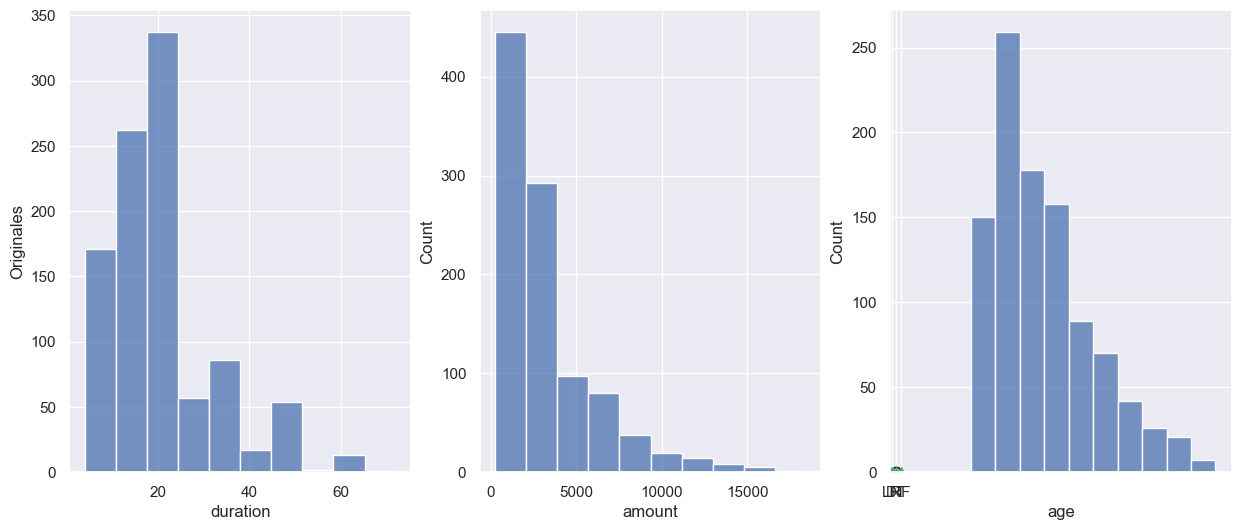

In [52]:
# Ahora debemos imprimir los valores del recall en una gráfica de cajas y bigotes

sns.set(rc={'figure.figsize':(8,4)})
bpGmean = list()

for i in range(len(resultados)):
  rr = resultados[i]['test_recall']
  bpGmean.append(rr)

plt.boxplot(bpGmean, labels=nombres, showmeans=True)
plt.show()

Vamos a analizar cada modelo por separado.

**Logistic Regression**. Tiene valores cercanos de exactitud al 0.8 tanto en entrenamiento como en validación. Esto significa que el modelo tiene poca varianza pero un sesgo moderado. Podemos decir que el modelo está **subentrenado.**

**Decision Tree**. Tiene valor 1.00 en la exactitud del entrenamiento y 0.67 en la validación lo que nos dice que el modelo tiene una alta varianza y sesgo inexistente. El modelo está claramente **sobreentrenado.**

**Random Forest**. Tiene valor de 1.00 en la exactitud del entrenamiento y 0.75 en la validación lo que nos dice que el modelo tiene una moderada varianza y un sesgo inexistente. Por tal motivo, este modelo está **sobreentrenado.**


In [53]:
# Funciones de ayuda para la learning curve
def mi_LearningCurvePlot(metrica, train_sizes, train_scores, val_scores):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel(metrica)
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()
    
def mi_ModeloYCurvasLogisticRegression(Xin, training_size):
      
        modelo = LogisticRegression(max_iter=2000, random_state=1)
        mi_pipe = Pipeline([('escalar', StandardScaler()), ('modelo', modelo)])
        #mi_pipe = Pipeline(steps=[('ct',columnasTransformer),('modelo',modelos)])
                        
        mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)
        
        # Aquí se asignan 20 puntos en la partición
        delta_train_sz =  np.linspace(.1, 1, training_size)

        # Custom scorer
        scorer = make_scorer(lambda y_true, y_pred: f1_score(
                            y_true, y_pred, 
                            labels=None,
                            average='binary', 
                            sample_weight=None))
 
        tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,    
                                                        X = Xin,
                                                        y = y_train,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz,
                                                        scoring = scorer,
                                                        random_state=11)
    
       # Obtenemos el gráfico con las curvas de aprendizaje:
        mi_LearningCurvePlot("Exactitud", tr_sizes, tr_scores, val_scores)
        
def mi_ModeloYCurvasDecisionTree(Xin):
      
        modelo = DecisionTreeClassifier(max_depth=20)
        mi_pipe = Pipeline([('escalar', StandardScaler()), ('modelo', modelo)])
        #mi_pipe = Pipeline(steps=[('ct',columnasTransformer),('modelo',modelos)])
                        
        mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)
        
        # Aquí se asignan 20 puntos en la partición
        delta_train_sz =  np.linspace(.1, 1, 20)

        # Custom scorer
        scorer = make_scorer(lambda y_true, y_pred: f1_score(
                            y_true, y_pred, 
                            labels=None,
                            average='binary', 
                            sample_weight=None))
 
        tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,    
                                                        X = Xin,
                                                        y = y_train,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz,
                                                        scoring = scorer,
                                                        random_state=11)
    
       # Obtenemos el gráfico con las curvas de aprendizaje:
        mi_LearningCurvePlot("F1-Score", tr_sizes, tr_scores, val_scores)
        
def mi_ModeloYRandomForest(Xin):
      
        modelo = RandomForestClassifier()
        mi_pipe = Pipeline([('escalar', StandardScaler()), ('modelo', modelo)])
        #mi_pipe = Pipeline(steps=[('ct',columnasTransformer),('modelo',modelos)])
                        
        mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)
        
        # Aquí se asignan 20 puntos en la partición
        delta_train_sz =  np.linspace(.1, 1, 20)

        # Custom scorer
        scorer = make_scorer(lambda y_true, y_pred: recall_score(
                            y_true, y_pred, 
                            labels=None,
                            average='binary', 
                            sample_weight=None))
 
        tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,    
                                                        X = Xin,
                                                        y = y_train,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz,
                                                        scoring = scorer,
                                                        random_state=11)
    
       # Obtenemos el gráfico con las curvas de aprendizaje:
        mi_LearningCurvePlot("Recall", tr_sizes, tr_scores, val_scores)
            
    

**Curva de aprendizaje para la Regresión Logística**

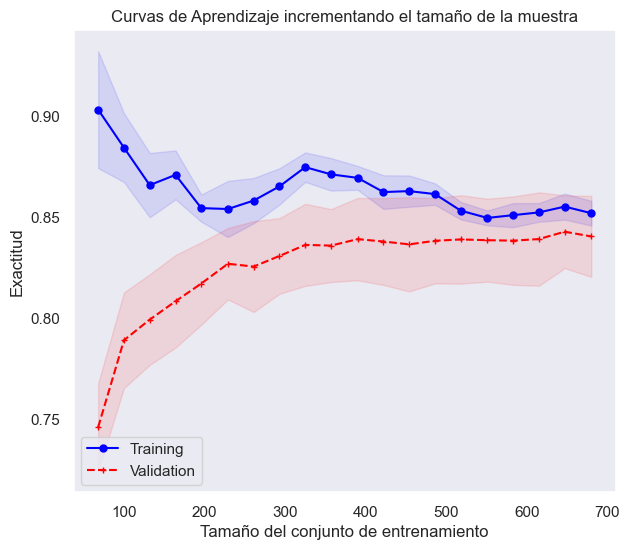

In [54]:
mi_ModeloYCurvasLogisticRegression(X_train, 20)

**Curva de aprendizaje Decision Tree**

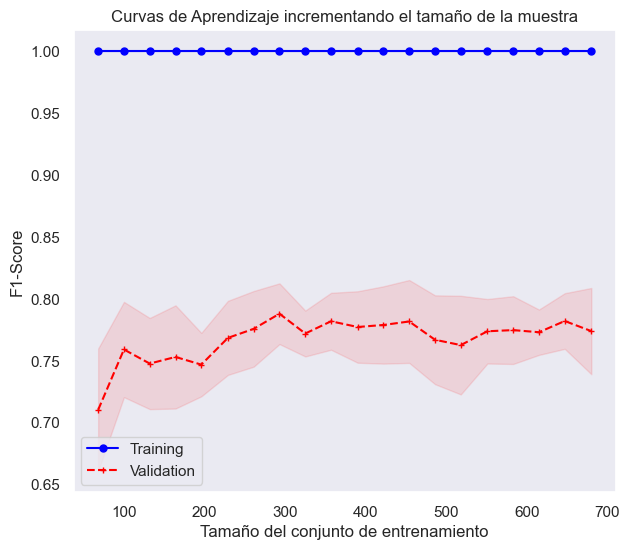

In [55]:
mi_ModeloYCurvasDecisionTree(X_train)

**Curva de aprendizaje de Random Forest**

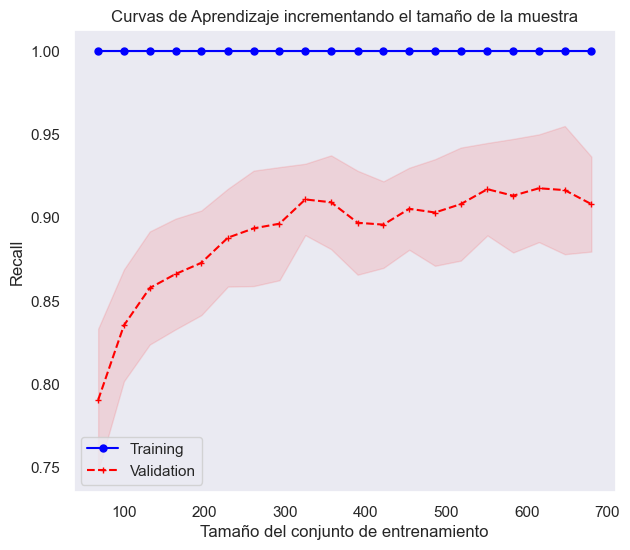

In [56]:
mi_ModeloYRandomForest(X_train)

#**Ejercicio-5.**

Finalmente veamos la manera de mejorar los valores de los hiperparámetros de cada modelo, así 
como el problema del sobreentrenamiento de algunos de ellos. Para ello deberás usar el método 
GridSearchCV() de scikit-learn. 

Recuerda que este método hace una búsqueda de los mejores hiperparámetros de un modelo mediante el llamada formato de malla y aplicando validación cruzada. En cada caso puedes incrementar el máximo de iteraciones,”max_iter” para que tengas la convergencia adecuada para todas las combinaciones en cada modelo. 

Recuerda también aplicar las transformaciones que definiste en tu Pipeline. Para fines de este ejercicio se ha 
seleccionado para cada modelo una métrica diferente, que permita irte familiarizando con ellas. 

Puedes consultar su documentación de GridSearchCV en la siguiente liga: 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html 


- a. Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores 
hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su 
búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso 
deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de 
parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la 
métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones. **NOTA: Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son 
posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la 
documentación.** 


- b. Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” 
para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve), 
incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees 
adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y 
evitar el sobreentrenamiento o el subentrenamiento. 


- c. Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando 
sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir 
en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, 
min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) 
“precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor 
del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de 
la métrica “precision”? Incluye tus conclusiones. 


- d. Con los mejores valores de los hiperparámetros encontrados con la métrica “precision” 
para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve), 
incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees 
adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y 
evitar el sobreentrenamiento o el subentrenamiento. 


- e. Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando 
sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir 
en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, 
min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”. 
Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor 
desempeño (score) obtenido con la métrica “recall”. ¿Cuál es la utilidad de la métrica 
“recall”? Incluye tus conclusiones. 
NOTA: Toma en cuenta que el método de random forest pude tardar varios minutos en 
llevar a cabo 


- f. Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para 
el modelo de bosque aleatorio, obtener las curvas de validación (validation curve), 
incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con 
al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres 
adecuados para mejorar el resultado y evitar el sobreentrenamiento o el 
subentrenamiento. 

**Regresión Logística, búsqueda de mejores parámetros y learning curve:**


In [57]:
modelo = LogisticRegression(max_iter=10000, random_state=1)

        
dicc_grid = {'C':[0.0001,0.01,0.1,1.0,10.,100.],
             'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
             'class_weight' : [None,'balanced'],
             'penalty' : ['l1','l2']
             }

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)

grid = GridSearchCV(estimator=modelo, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring='f1')

# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(X_train)

grid.fit(Xx, np.ravel(y_train))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de exactitud obtenido con la mejor combinación: 0.8392243037309112
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Métrica utilizada: f1


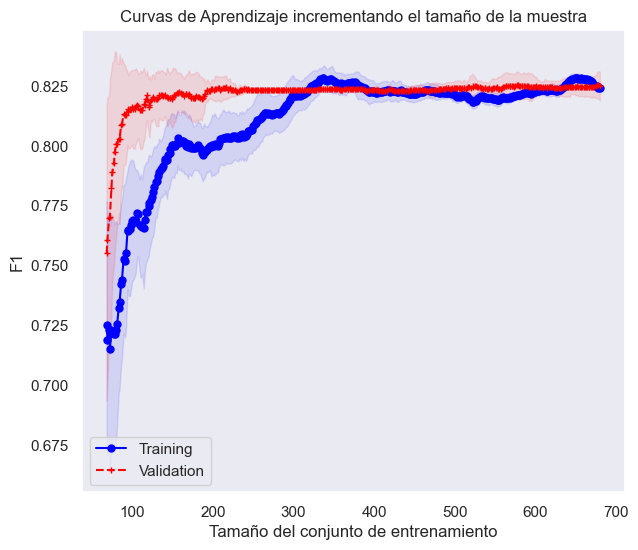

In [58]:
# Modelo de Regresión Logística con los hiperparámetros tuneados

modelo = LogisticRegression(C=1.0, penalty='l2', class_weight=None, solver='saga', max_iter=7000, random_state=1)

mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

# Aquí se asignan 20 puntos en la partición
delta_train_sz =  np.linspace(.1, 1, 400)

# Custom scorer
scorer = make_scorer(lambda y_true, y_pred: f1_score(
                    y_true, y_pred, 
                    labels=None,
                    average='binary', 
                    sample_weight=None))

tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,    
                                                X = X_train,
                                                y = y_train,
                                                cv = mi_kfold ,
                                                train_sizes = delta_train_sz,
                                                scoring = scorer,
                                                random_state=11)

# Obtenemos el gráfico con las curvas de aprendizaje:
mi_LearningCurvePlot("F1", tr_sizes, tr_scores, val_scores)

**Decision Tree, búsqueda de mejores parámetros y learning curve:**

In [59]:
modelo = DecisionTreeClassifier(max_depth=20)
        
dicc_grid = {'ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100.],
             'criterion':['gini', 'entropy'],
             'max_depth' : range(2, 10),
             'min_samples_split' : range(2, 10),
             'class_weight': [None,'balanced']
             }

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)

grid = GridSearchCV(estimator=modelo, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring='precision')

# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(X_train)

grid.fit(Xx, np.ravel(y_train))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de exactitud obtenido con la mejor combinación: 0.8635012843194165
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0001, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}
Métrica utilizada: precision


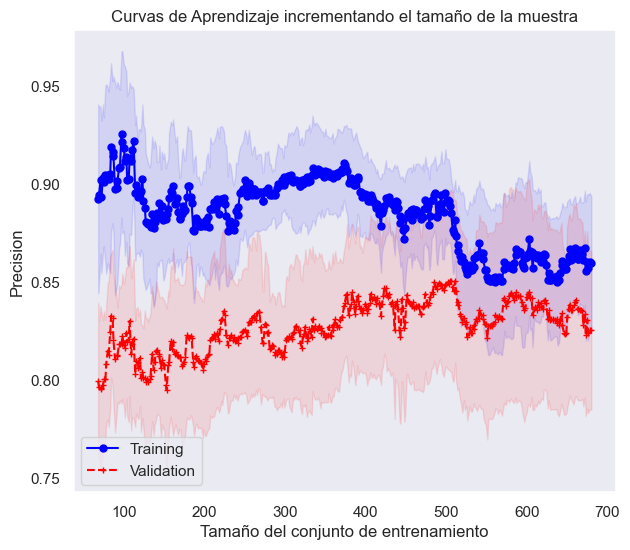

In [60]:
# Curva de aprendizaje para Decision Tree con los hiperparámetros afinados:

# Modelo de Regresión Logística con los hiperparámetros tuneados

modelo = DecisionTreeClassifier(ccp_alpha         =  0.0001, 
                                class_weight      = 'balanced', 
                                criterion         = 'gini', 
                                max_depth         = 3, 
                                min_samples_split = 2,
                                random_state       = 1)

mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

# 20 veces más de tamaño en la partición
delta_train_sz =  np.linspace(.1, 1, 400)

# Custom scorer
scorer = make_scorer(lambda y_true, y_pred: precision_score(
                    y_true, y_pred, 
                    labels=None,
                    average='binary', 
                    sample_weight=None))

tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,    
                                                X = X_train,
                                                y = y_train,
                                                cv = mi_kfold ,
                                                train_sizes = delta_train_sz,
                                                scoring = scorer,
                                                random_state=11)

# Obtenemos el gráfico con las curvas de aprendizaje:
mi_LearningCurvePlot("Precision", tr_sizes, tr_scores, val_scores)

Aquí utilizamos la precisión, y podemos ver que el model tiene un gran sesgo y varianza lo que nos indica que está subentrenado.


**Random Forest, búsqueda de mejores parámetros y learning curve:**
   
    

In [61]:

modelo = RandomForestClassifier()
        
dicc_grid = {'ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100.],
             'criterion':['gini', 'entropy'],
             'max_depth' : range(2, 10),
             'min_samples_split' : range(2, 10),
             'class_weight': [None,'balanced']
             }

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)

grid = GridSearchCV(estimator=modelo, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring='recall')

# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(X_train)

grid.fit(Xx, np.ravel(y_train))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de exactitud obtenido con la mejor combinación: 1.0
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0001, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
Métrica utilizada: recall


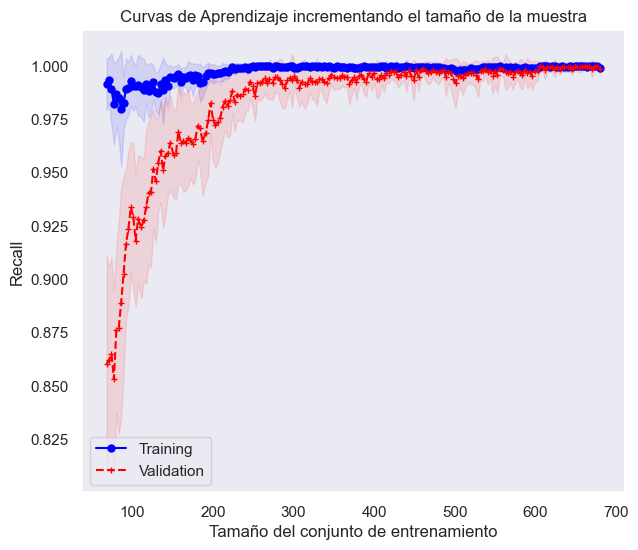

In [62]:
# Curva de aprendizaje para Random Forest con los hiperparámetros afinados:

# Modelo de Regresión Logística con los hiperparámetros tuneados

# modelo = DecisionTreeClassifier(ccp_alpha         =  0.0001, 
#                                 class_weight      =  None, 
#                                 criterion         = 'gini', 
#                                 max_depth         = 10, 
#                                 min_samples_split = 8,
#                                 random_state       = 1)

modelo = RandomForestClassifier(ccp_alpha= 0.0001, class_weight = None, criterion='gini', max_depth= 2,
                                min_samples_split= 8)

mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

# 10 veces más de tamaño en la partición
delta_train_sz =  np.linspace(.1, 1, 200)

# Custom scorer
scorer = make_scorer(lambda y_true, y_pred: recall_score(
                    y_true, y_pred, 
                    labels=None,
                    average='binary', 
                    sample_weight=None))

tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,    
                                                X = X_train,
                                                y = y_train,
                                                cv = mi_kfold ,
                                                train_sizes = delta_train_sz,
                                                scoring = scorer,
                                                random_state=11)

# Obtenemos el gráfico con las curvas de aprendizaje:
mi_LearningCurvePlot("Recall", tr_sizes, tr_scores, val_scores)

#**Ejercicio-6.**

Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando
el conjunto de Prueba que no has utilizado hasta ahora, obtener los modelos finales como se te
indica a continuación. Deberás usar además como conjunto de entrenamiento el llamado modelo
de entrenamiento “aumentado” que consiste en las datos que estuviste utilizando para
entrenamiento y validación:
a. Obtener el modelo de regresión logística con los mejores parámetros que hayas
encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye
tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final
obtenido.
b. Obtener el modelo de árbol de decisiones con los mejores parámetros que hayas
encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e
incluye tus conclusiones finales para este caso.
c. Obtener el modelo de bosque aleatorio con los mejores parámetros que hayas
encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye
tus conclusiones finales para este caso.

# LogisticRegression

In [185]:
#modeloFinal = LogisticRegression(max_iter=1000, random_state=1)
modelofinal_LR = LogisticRegression(C=1.0, penalty='l2', class_weight=None, solver='saga', max_iter=7000, random_state=1)

# Genrerar pipeline
pipeline = Pipeline(
    steps=[
        ("preprocess", columnasTransformer),
        ("base", modelofinal_LR),])


# Generar predicciones
pipeline.fit(X_train, y_train)
ytrain_pred= pipeline.predict(X_train)
ytest_pred = pipeline.predict(X_test)

print(f'Score f1 del mejor modelo en el conjunto de entrenamiento : {mi_f1score(ytrain_pred,y_train)}')
print(f'Score f1 del mejor modelo en el conjunto de prueba : {mi_f1score(ytest_pred,y_test)}')

Score f1 del mejor modelo en el conjunto de entrenamiento : 0.8145896656534954
Score f1 del mejor modelo en el conjunto de prueba : 0.7786885245901639


# DecisionTreeClassifier

In [191]:
modelofinal_DT = DecisionTreeClassifier(ccp_alpha         =  0.0001, 
                                class_weight      = 'balanced', 
                                criterion         = 'gini', 
                                max_depth         = 3, 
                                min_samples_split = 2,
                                random_state       = 1)

# Genrerar pipeline
pipeline = Pipeline(
    steps=[
        ("preprocess", columnasTransformer),
        ("base", modelofinal_DT),])

# Generar predicciones
pipeline.fit(X_train, y_train)
ytrain_pred= pipeline.predict(X_train)
ytest_pred = pipeline.predict(X_test)

print(f'Presicion score del mejor modelo en el conjunto de entrenamiento : {mi_precision(ytrain_pred,y_train)}')
print(f'Presicion score del mejor modelo en el conjunto de prueba : {mi_precision(ytest_pred,y_test)}')

Presicion score del mejor modelo en el conjunto de entrenamiento : 0.5680672268907563
Presicion score del mejor modelo en el conjunto de prueba : 0.6


# hacer grafica de arbol 

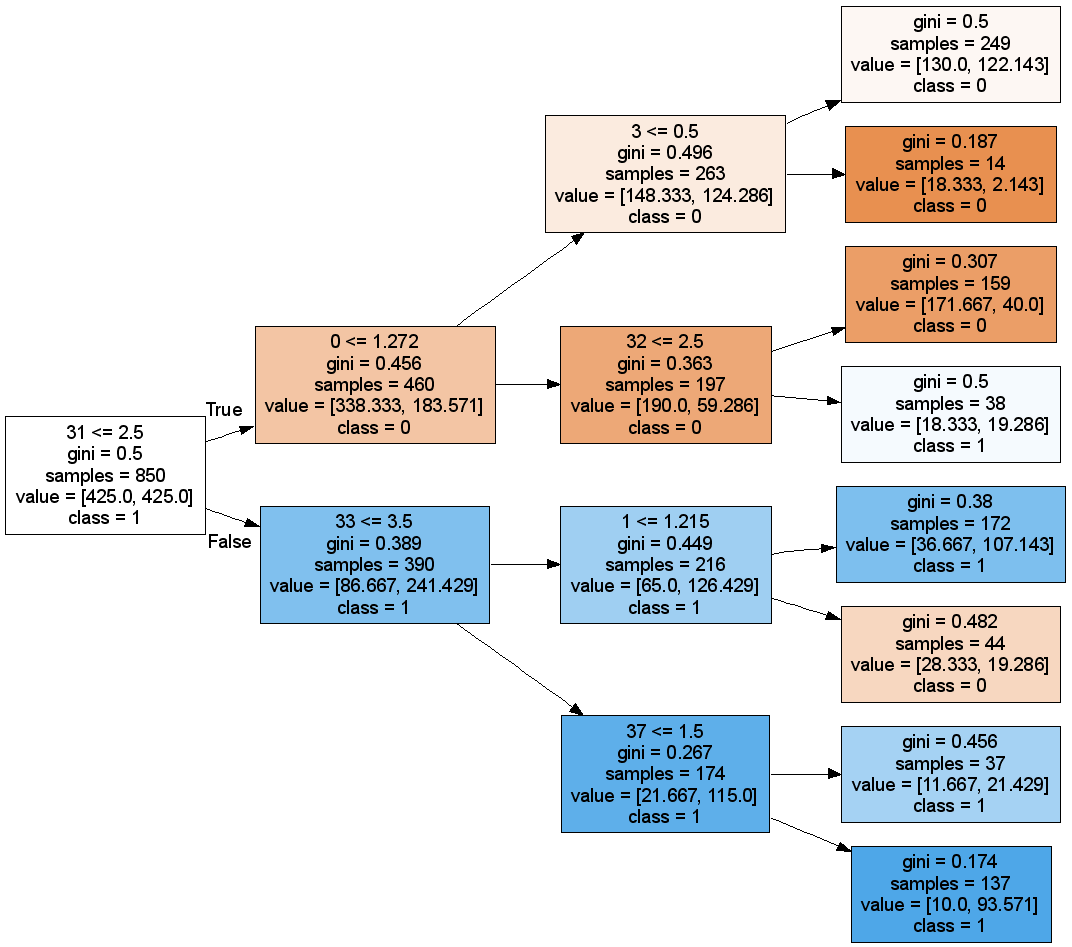

In [196]:
dot_data = tree.export_graphviz(decision_tree=pipeline['base'], 
                                out_file=None,
                                max_depth=None,
                                feature_names=list(pd.DataFrame(pipeline.named_steps["preprocess"].transform(X_train)).columns.values),
                                class_names=["0", "1"],
                                filled=True,
                                rotate=True,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Asignar nombres a las columnas para facilitar la interpretación

In [198]:
encoded=list(pipeline.named_steps["preprocess"].transformers_[1][1].named_steps['OneHotE'].get_feature_names(catOHE_pipeline_nombres))


In [199]:
original=list(dfMain.columns)

In [202]:
feature_l=[]
for item in original:   
    if (item+"_1") in encoded or (item+"_2") in encoded:
        for item2 in encoded:
            if item+"_" in item2:
                feature_l.append(item2)
    else:
        feature_l.append(item)
feature_l        

['status',
 'duration',
 'credit_history_1',
 'credit_history_2',
 'credit_history_3',
 'credit_history_4',
 'purpose_1',
 'purpose_2',
 'purpose_3',
 'purpose_4',
 'purpose_5',
 'purpose_6',
 'purpose_8',
 'purpose_9',
 'purpose_10',
 'amount',
 'savings',
 'employment_duration',
 'installment_rate',
 'personal_status_sex_2',
 'personal_status_sex_3',
 'personal_status_sex_4',
 'other_debtors_2',
 'other_debtors_3',
 'present_residence',
 'property_2',
 'property_3',
 'property_4',
 'age',
 'other_installment_plans_2',
 'other_installment_plans_3',
 'housing_2',
 'housing_3',
 'number_credits',
 'job_2',
 'job_3',
 'job_4',
 'people_liable',
 'telephone',
 'foreign_worker',
 'credit_risk']

In [204]:
feature_l.remove("credit_risk")
len(feature_l)

40

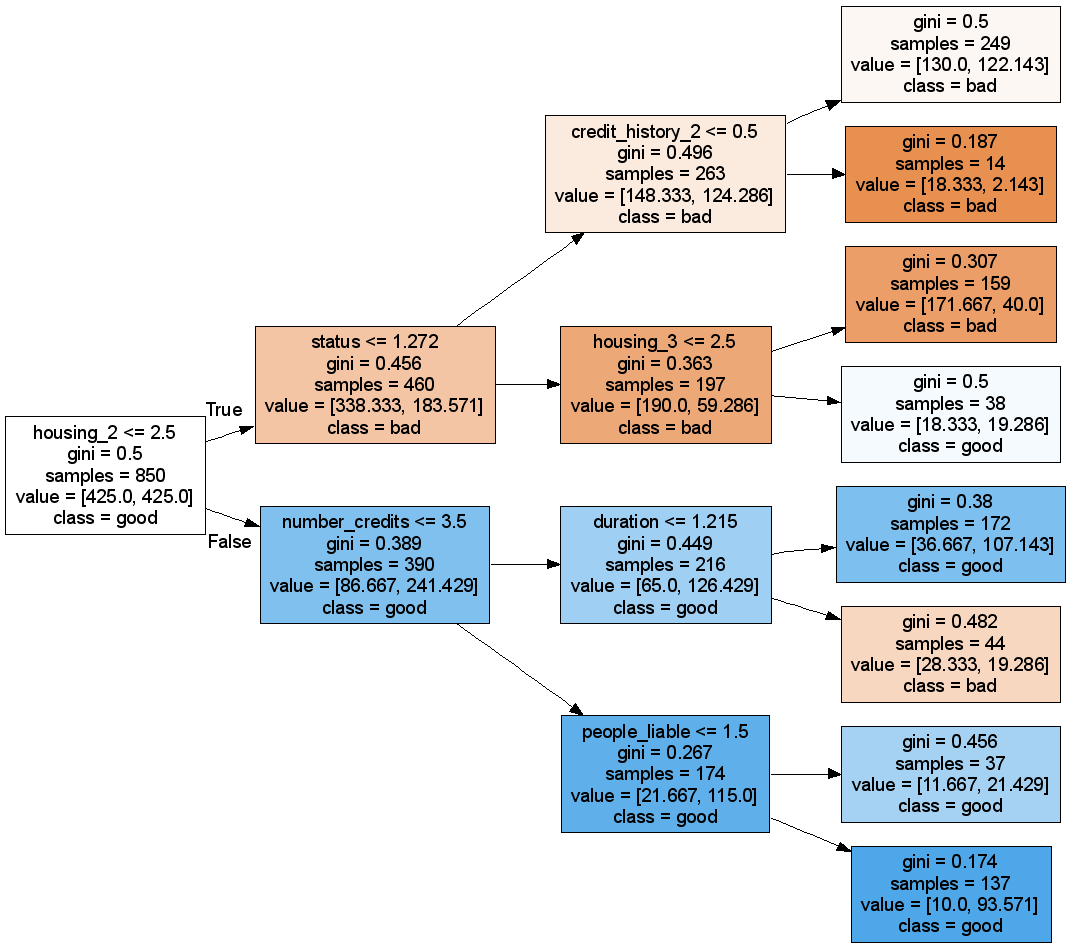

In [205]:
dot_data = tree.export_graphviz(decision_tree=pipeline['base'], 
                                out_file=None,
                                max_depth=None,
                                feature_names=feature_l,
                                class_names=["bad", "good"],
                                filled=True,
                                rotate=True,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Intepretación
* Un buen credito  depende de si housing  (cuenta con casa propia),numero creditos <=3.5 usuario no se cuenta con mas de 6 creditos, people _liable <= 1.5 (numero dependientes)
* Un mal credito esta asociado a no tener casa propia, status y el historial de creditos del pasado

# RandomForestClassifier

In [235]:
# modelo
modelofinal_RF = RandomForestClassifier(ccp_alpha= 0.0001, class_weight = None, criterion='gini', max_depth= 2, min_samples_split= 8)

# Genrerar pipeline
pipeline = Pipeline(
    steps=[
        ("preprocess", columnasTransformer),
        ("base", modelofinal_RF),])


# Generar predicciones
pipeline.fit(X_train, y_train)

ytrain_pred= pipeline.predict(X_train)
ytest_pred = pipeline.predict(X_test)

print(f'Recall score del mejor modelo en el conjunto de entrenamiento : {mi_recall(ytrain_pred,y_train)}')
print(f'Recall score del mejor modelo en el conjunto de prueba : {mi_recall(ytest_pred,y_test)}')

Recall score del mejor modelo en el conjunto de entrenamiento : 0.7008244994110718
Recall score del mejor modelo en el conjunto de prueba : 0.7


## features de relevancia

In [236]:
pipeline['base'].feature_importances_

array([1.21554366e-01, 8.28637026e-02, 1.88810794e-02, 3.05844946e-02,
       4.06866343e-03, 3.82005440e-03, 6.36137336e-02, 9.97943691e-03,
       6.31486039e-04, 1.57625039e-02, 0.00000000e+00, 0.00000000e+00,
       2.97497947e-03, 0.00000000e+00, 7.87807332e-03, 6.40603960e-04,
       1.34597660e-02, 1.74713078e-02, 2.75208334e-03, 4.95595835e-03,
       1.29912117e-03, 0.00000000e+00, 1.22399546e-03, 2.33169747e-02,
       0.00000000e+00, 2.78083592e-02, 3.43857739e-02, 2.91657783e-03,
       2.10623597e-03, 3.35808732e-03, 2.23481490e-04, 3.56261677e-01,
       9.76778928e-02, 2.22331068e-02, 1.16586004e-02, 1.97761092e-03,
       2.19871238e-03, 0.00000000e+00, 7.92768995e-03, 1.53380952e-03])

## features de relevancia por nombre

In [237]:
random_forest_features=[]
for a,b in enumerate(list(pipeline['base'].feature_importances_)):
    random_forest_features.append( (feature_l[a], b ))

In [238]:
random_forest_features.sort(key = lambda x:x[1],reverse=True)


In [239]:
random_forest_features

[('housing_2', 0.3562616769050546),
 ('status', 0.12155436608380384),
 ('housing_3', 0.09767789276663827),
 ('duration', 0.08286370264200629),
 ('purpose_1', 0.06361373364146344),
 ('property_3', 0.03438577393325834),
 ('credit_history_2', 0.030584494585211734),
 ('property_2', 0.027808359203526242),
 ('other_debtors_3', 0.02331697468853379),
 ('number_credits', 0.0222331068114367),
 ('credit_history_1', 0.01888107939889384),
 ('employment_duration', 0.017471307839558855),
 ('purpose_4', 0.015762503867953696),
 ('savings', 0.013459766016441945),
 ('job_2', 0.01165860038458818),
 ('purpose_2', 0.009979436911744717),
 ('telephone', 0.007927689949778667),
 ('purpose_10', 0.007878073324016082),
 ('personal_status_sex_2', 0.004955958345718516),
 ('credit_history_3', 0.004068663432121104),
 ('credit_history_4', 0.0038200543989890473),
 ('other_installment_plans_2', 0.0033580873243678143),
 ('purpose_8', 0.0029749794658359215),
 ('property_4', 0.0029165778325728094),
 ('installment_rate', 0.0

In [240]:
print(f"las 5 caracterisitcas mas importantes son : \n {random_forest_features[0:5]}")

las 5 caracterisitcas mas importantes son : 
 [('housing_2', 0.3562616769050546), ('status', 0.12155436608380384), ('housing_3', 0.09767789276663827), ('duration', 0.08286370264200629), ('purpose_1', 0.06361373364146344)]


###**Fin de la Actividad de la semana 6.**